## Introduction to Spark

Industries are using Hadoop extensively to analyze their data sets. The reason is that Hadoop framework is based on a simple programming model (MapReduce), and it enables a computing solution that is scalable, flexible, fault-tolerant and cost effective. Here, the main concern is to maintain speed in processing large datasets in terms of waiting time between queries and waiting time to run the program.

Problems of Hadoop: No functionality available to minimize shuffling, minimize storage on hard disk and no efficient scheduling mechanism available - workflow management is weak (Apache oozie is a workflow manager for Hadoop but its technology is inefficient as compared to Spark’s DAG).


## Connection to Spark Cluster (PySpark)

In [ ]:
import findspark
findspark.init()

In [ ]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('jupyter-spark') \
    .enableHiveSupport()\
    .getOrCreate()
sc = spark.sparkContext

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


# Checking if spark is working or not

In [ ]:
spark

In [ ]:
!pwd

/notebook


## Loading file on HDFS

In [ ]:
!hdfs dfs -put /notebook/usd.csv /tmp/spark/
!hadoop fs -ls /tmp/spark

Found 2 items
-rw-r--r--   2 root supergroup    1185010 2024-01-06 12:43 /tmp/spark/indexProcessed.csv
-rw-r--r--   2 root supergroup     205580 2024-01-06 13:13 /tmp/spark/usd.csv


In [ ]:
rdd = sc.textFile('hdfs:///tmp/spark/usd.csv')

In [ ]:
rdd.foreach(lambda f: print(f))

In [ ]:
rdd.collect()

['Date,Open,High,Low,Close,Volume,Currency',
 '18/07/2010,0,0.1,0.1,0.1,75,USD',
 '19/07/2010,0.1,0.1,0.1,0.1,574,USD',
 '20/07/2010,0.1,0.1,0.1,0.1,262,USD',
 '21/07/2010,0.1,0.1,0.1,0.1,575,USD',
 '22/07/2010,0.1,0.1,0.1,0.1,2160,USD',
 '23/07/2010,0.1,0.1,0.1,0.1,2403,USD',
 '24/07/2010,0.1,0.1,0.1,0.1,496,USD',
 '25/07/2010,0.1,0.1,0.1,0.1,1551,USD',
 '26/07/2010,0.1,0.1,0.1,0.1,877,USD',
 '27/07/2010,0.1,0.1,0.1,0.1,3374,USD',
 '28/07/2010,0.1,0.1,0.1,0.1,4390,USD',
 '29/07/2010,0.1,0.1,0.1,0.1,8058,USD',
 '30/07/2010,0.1,0.1,0.1,0.1,3021,USD',
 '31/07/2010,0.1,0.1,0.1,0.1,4022,USD',
 '01/08/2010,0.1,0.1,0.1,0.1,2601,USD',
 '02/08/2010,0.1,0.1,0.1,0.1,3599,USD',
 '03/08/2010,0.1,0.1,0.1,0.1,9821,USD',
 '04/08/2010,0.1,0.1,0.1,0.1,3494,USD',
 '05/08/2010,0.1,0.1,0.1,0.1,5034,USD',
 '06/08/2010,0.1,0.1,0.1,0.1,1395,USD',
 '07/08/2010,0.1,0.1,0.1,0.1,2619,USD',
 '08/08/2010,0.1,0.1,0.1,0.1,2201,USD',
 '09/08/2010,0.1,0.1,0.1,0.1,13631,USD',
 '10/08/2010,0.1,0.1,0.1,0.1,1310,USD',
 '1

In [ ]:
df = spark.sql(f"SELECT * FROM Crypto")

In [ ]:
df.show()

+-----+----+----+----+------+------+--------+
|daate|open|high| low|cloose|volume|currency|
+-----+----+----+----+------+------+--------+
| null|null|null|null|  null|  null|Currency|
| null| 0.0| 0.1| 0.1|   0.1|  75.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1| 574.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1| 262.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1| 575.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1|2160.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1|2403.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1| 496.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1|1551.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1| 877.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1|3374.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1|4390.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1|8058.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1|3021.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1|4022.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1|2601.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1|3599.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1|9821.0|     USD|
| null| 0.1| 0.1| 0.1|   0.1|3494.

#Mean Median Mode
# Load the CSV file into a DataFrame

In [ ]:
import pandas as pd

file_path = 'usd.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Calculate mean, median, and mode for all numeric columns

In [ ]:
summary_stats = pd.DataFrame(index=['mean', 'median', 'mode'])
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    summary_stats[column] = [df[column].mean(), df[column].median(), df[column].mode()[0]]

# Output the summary statistics

In [ ]:
print(summary_stats)

               Open        High          Low        Close        Volume
mean    8302.221855  8531.97138  8043.473869  8306.969457  1.395788e+07
median   683.600000   706.50000   657.550000   685.000000  6.762050e+04
mode       0.100000     0.10000     0.100000     0.100000  0.000000e+00


#Correlation
# Load the CSV file into a DataFrame

In [ ]:
file_path = 'usd.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Calculate the correlation matrix for the relevant columns

In [ ]:
relevant_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
correlation_matrix = df[relevant_columns].corr()

# Output the correlation matrix

In [ ]:
print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.999589  0.999221  0.998996  0.182761
High    0.999589  1.000000  0.999158  0.999556  0.182589
Low     0.999221  0.999158  1.000000  0.999468  0.183437
Close   0.998996  0.999556  0.999468  1.000000  0.182242
Volume  0.182761  0.182589  0.183437  0.182242  1.000000


# Using PySpark Linear Regression

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
import urllib.request

In [ ]:
spark = SparkSession.builder.appName("LinearRegressionExample").getOrCreate()

In [ ]:
url = "https://raw.githubusercontent.com/asadsheikh1/MachineLearningPredictions/main/usd.csv"
local_file_path = "/usd.csv"
urllib.request.urlretrieve(url, local_file_path)

('/usd.csv', <http.client.HTTPMessage at 0x7f8da1e128b0>)

In [ ]:
df = pd.read_csv(local_file_path)

In [ ]:
!hdfs dfs -ls hdfs://master/

Found 5 items
drwxr-xr-x   - root supergroup          0 2024-01-06 08:22 hdfs://master/spark
drwxrwx---   - root supergroup          0 2024-01-06 12:55 hdfs://master/tmp
-rw-r--r--   2 root supergroup     205580 2024-01-06 13:26 hdfs://master/usd.csv
drwxr-xr-x   - root supergroup          0 2024-01-06 08:29 hdfs://master/user
drwxr-xr-x   - root supergroup          0 2024-01-06 08:22 hdfs://master/var


In [ ]:
!hdfs dfs -put /notebook/usd.csv /

In [ ]:
data = spark.read.csv(local_file_path, header=True, inferSchema=True)

In [ ]:
data

DataFrame[Date: string, Open: double, High: double, Low: double, Close: double, Volume: bigint, Currency: string]

In [ ]:
data.printSchema()
data.show()

root
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Currency: string (nullable = true)

+----------+----+----+---+-----+------+--------+
|      Date|Open|High|Low|Close|Volume|Currency|
+----------+----+----+---+-----+------+--------+
|18/07/2010| 0.0| 0.1|0.1|  0.1|    75|     USD|
|19/07/2010| 0.1| 0.1|0.1|  0.1|   574|     USD|
|20/07/2010| 0.1| 0.1|0.1|  0.1|   262|     USD|
|21/07/2010| 0.1| 0.1|0.1|  0.1|   575|     USD|
|22/07/2010| 0.1| 0.1|0.1|  0.1|  2160|     USD|
|23/07/2010| 0.1| 0.1|0.1|  0.1|  2403|     USD|
|24/07/2010| 0.1| 0.1|0.1|  0.1|   496|     USD|
|25/07/2010| 0.1| 0.1|0.1|  0.1|  1551|     USD|
|26/07/2010| 0.1| 0.1|0.1|  0.1|   877|     USD|
|27/07/2010| 0.1| 0.1|0.1|  0.1|  3374|     USD|
|28/07/2010| 0.1| 0.1|0.1|  0.1|  4390|     USD|
|29/07/2010| 0.1| 0.1|0.1|  0.1|  8058|     USD|
|30

In [ ]:
assembler = VectorAssembler(inputCols=['Open', 'High', 'Low', 'Volume'], outputCol='features')
data = assembler.transform(data)


In [ ]:
data = data.withColumnRenamed('Close', 'label')

In [ ]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=1234)

In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='label')


In [ ]:
lr_model = lr.fit(train_data)

24/01/06 13:28:12 WARN Instrumentation: [449ecc41] regParam is zero, which might cause numerical instability and overfitting.


24/01/06 13:28:13 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [ ]:
predictions = lr_model.transform(test_data)

In [ ]:
evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)

In [ ]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 328.36905065002173
Coefficients: [-0.5225964280228949,0.9436926781269709,0.5714438384313415,-8.648311819732855e-08]
Intercept: 1.2594583827796186
Root Mean Squared Error (RMSE): 328.36905065002173


# Using Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/asadsheikh1/MachineLearningPredictions/main/usd.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Volume,Currency
0,18/07/2010,0.0,0.1,0.1,0.1,75,USD
1,19/07/2010,0.1,0.1,0.1,0.1,574,USD
2,20/07/2010,0.1,0.1,0.1,0.1,262,USD
3,21/07/2010,0.1,0.1,0.1,0.1,575,USD
4,22/07/2010,0.1,0.1,0.1,0.1,2160,USD
...,...,...,...,...,...,...,...
4415,19/08/2022,23201.6,23202.3,20807.8,20831.3,339472,USD
4416,20/08/2022,20830.7,21357.4,20784.8,21138.9,206943,USD
4417,21/08/2022,21138.9,21692.4,21077.4,21517.2,177522,USD
4418,22/08/2022,21516.8,21517.4,20912.1,21416.3,251833,USD


In [ ]:
data.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,4420.000000,4420.000000,4420.000000,4420.000000,4.420000e+03
mean,8302.221855,8531.971380,8043.473869,8306.969457,1.395788e+07
std,14598.398937,14992.605971,14146.499234,14599.046649,1.645973e+08
min,0.000000,0.100000,0.000000,0.100000,0.000000e+00
25%,122.500000,129.975000,118.300000,122.800000,3.013600e+04
50%,683.600000,706.500000,657.550000,685.000000,6.762050e+04
75%,8877.250000,9122.700000,8666.900000,8886.075000,1.769402e+05
max,67528.700000,68990.600000,66334.900000,67527.900000,4.468697e+09


In [ ]:
data.nunique()

Date        4420
Open        3462
High        3453
Low         3463
Close       3469
Volume      4369
Currency       1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4420 non-null   object 
 1   Open      4420 non-null   float64
 2   High      4420 non-null   float64
 3   Low       4420 non-null   float64
 4   Close     4420 non-null   float64
 5   Volume    4420 non-null   int64  
 6   Currency  4420 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 241.8+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = (data['Date'] - data['Date'].min()).dt.days

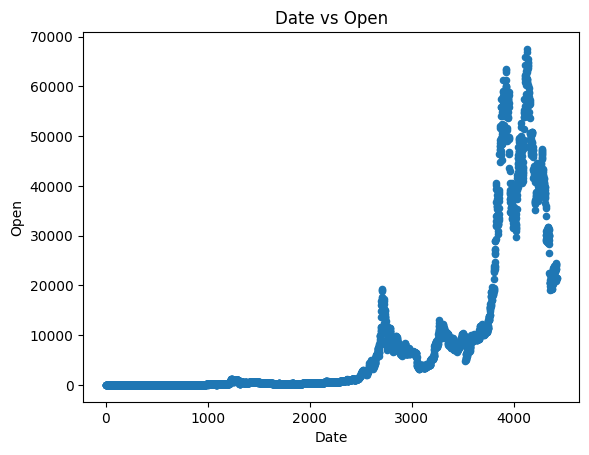

In [ ]:
data.plot(x='Date', y='Open', kind='scatter')
plt.title('Date vs Open')
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

In [ ]:
data.describe()

,Date,Open,High,Low,Close,Volume
count,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4.420000e+03
mean,2209.500000,8302.221855,8531.971380,8043.473869,8306.969457,1.395788e+07
std,1276.088424,14598.398937,14992.605971,14146.499234,14599.046649,1.645973e+08
min,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000e+00
25%,1104.750000,122.500000,129.975000,118.300000,122.800000,3.013600e+04
50%,2209.500000,683.600000,706.500000,657.550000,685.000000,6.762050e+04
75%,3314.250000,8877.250000,9122.700000,8666.900000,8886.075000,1.769402e+05
max,4419.000000,67528.700000,68990.600000,66334.900000,67527.900000,4.468697e+09


In [ ]:
Columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
min_max_scaler = MinMaxScaler()
data[Columns] = min_max_scaler.fit_transform(data[Columns])
data.head()

,Date,Open,High,Low,Close,Volume,Currency
0,0.000000,0.000000,0.0,0.000002,0.0,1.678342e-08,USD
1,0.000226,0.000001,0.0,0.000002,0.0,1.284491e-07,USD
2,0.000453,0.000001,0.0,0.000002,0.0,5.863007e-08,USD
3,0.000679,0.000001,0.0,0.000002,0.0,1.286729e-07,USD
4,0.000905,0.000001,0.0,0.000002,0.0,4.833624e-07,USD


In [ ]:
data['Currency'] = (data['Currency'] == 'USD').astype(int)

In [ ]:
X = data.drop(['Open'] , axis = 1)
Y = data['Open']

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.2 , random_state = 30)

# Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
X.size

26520

In [ ]:
Y.size

4420

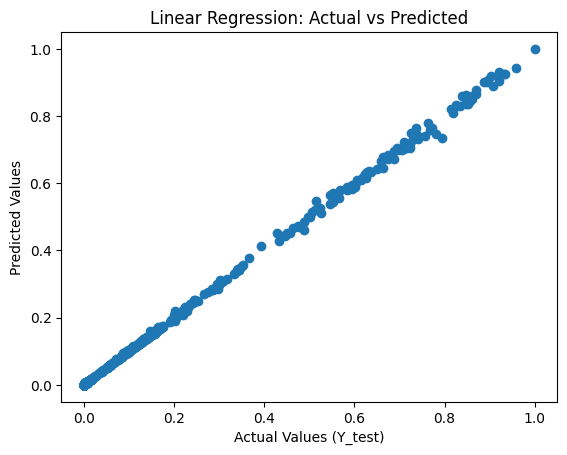

In [ ]:

y_pred = model.predict(X_test)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


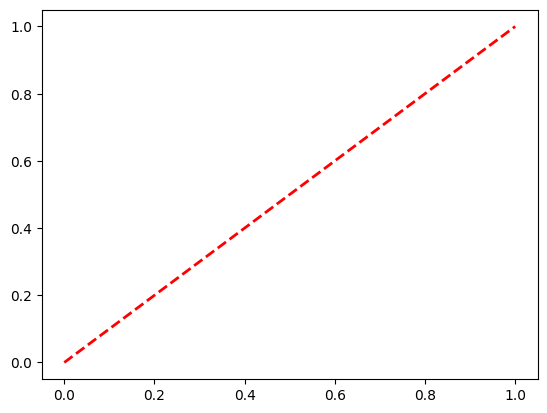

In [ ]:
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:

predicted_vs_target = pd.DataFrame({'Predicted': y_pred, 'Target': Y_test})
predicted_vs_target


,Predicted,Target
4319,0.444401,0.445420
4042,0.684378,0.675168
3300,0.143587,0.141870
1852,0.003933,0.003964
3324,0.151067,0.153852
...,...,...
664,0.000064,0.000074
29,-0.000019,0.000001
1452,0.009044,0.009112
3050,0.063872,0.064578


In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(Y_test, y_pred))


Mean Absolute Error:  0.0018525007111413413
Mean Squared Error:  2.366342063341151e-05
Root Mean Squared Error:  0.004864506206534381
Coefficient of Determination (R2 Score):  0.9995404653805043
